In [51]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm



In [52]:
K = 600
n = 0.15
nb_points = 10
x = np.linspace(0, 1, nb_points)

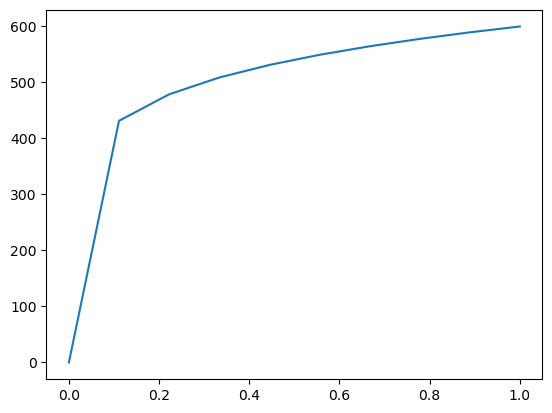

In [53]:
def compute_stress(K, n, x):
    return K * x ** n

y = compute_stress(K, n, x)

plt.plot(x, y)

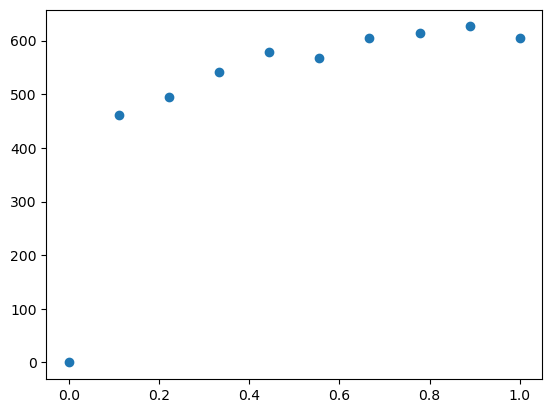

In [54]:
def generate_experimental_noisy_points(K, n, x):
    target = K * x ** n
    noise = 0.1 * np.random.random(nb_points) * target
    return target + noise

y_exp = generate_experimental_noisy_points(K, n, x)

plt.scatter(x, y_exp)

In [55]:
def mean_square_error(y, y_exp):
    residus = (y - y_exp)
    return np.sum(residus**2) / len(y)

mean_square_error(y, y_exp)

909.2404969921581

In [70]:
def scale_parameters(X):
    # return scaled parameters between [0, 1] for gradient convergence optimization
    K_scale = ( X[0] - 0 ) / ( 2000 - 0 )
    n_scale = ( X[1] - 0.01 ) / ( 0.5 - 0.01 )
    return np.array([K_scale, n_scale])

scale_parameters(np.array([600, 0.15]))

def unscale_parameters(X):
    # return unscaled parameters between [min, max] for computing stress
    K = X[0] * ( 2000 - 0 ) + 0
    n = X[1] * ( 0.5 - 0.01 ) + 0.01
    return np.array([K, n])
    
unscale_parameters(np.array([0.3, 0.2857142857142857]))



array([6.0e+02, 1.5e-01])

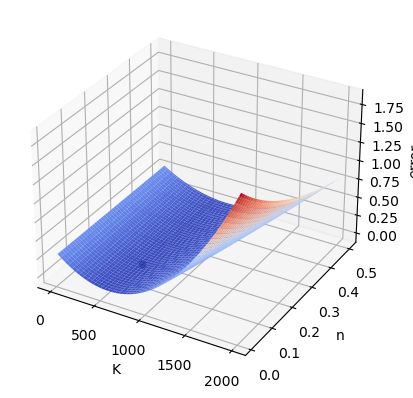

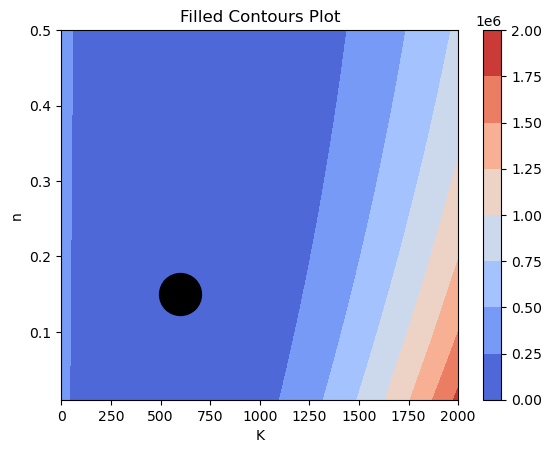

In [68]:
def plot_loss_function():
    K = np.linspace(0, 2000, 100)
    n = np.linspace(0.01, 0.5, 100)

    X, Y = np.meshgrid(K, n)
    zs = np.array(
        [mean_square_error(compute_stress(Ki, ni, x), y_exp) for Ki, ni in zip(np.ravel(X), np.ravel(Y))]
    )
    Z = zs.reshape(X.shape)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
    ax.scatter(600, 0.15, mean_square_error(compute_stress(600, 0.15, x), y_exp), color='black')
    ax.set_xlabel('K')
    ax.set_ylabel('n')
    ax.set_zlabel('error')
    
    fig2,ax2=plt.subplots(1,1)
    cp = ax2.contourf(X, Y, Z, cmap=cm.coolwarm)
    ax2.scatter(600, 0.15, mean_square_error(compute_stress(600, 0.15, x), y_exp), color='black')
    fig2.colorbar(cp) # Add a colorbar to a plot
    ax2.set_title('Filled Contours Plot')
    ax2.set_xlabel('K')
    ax2.set_ylabel('n')
    
    plt.show()


plot_loss_function()

In [98]:
def residus(y, y_exp):
    return y - y_exp

residu = residus(y, y_exp)
print(residu)

[  0.         -28.87107955 -16.83791907 -32.62872385 -47.02070872
 -18.83706643 -40.34649987 -36.71252925 -36.77341642  -4.12316213]


In [114]:
def jacobian(residu, K, n):
    # parameters
    X = [K, n]
    delta = 0.01
    J = np.zeros((len(residu), len(X)))
    # iteration for each parameter
    for i in range(len(X)):
        # finite difference for partial derivatives
        X2 = X
        X2[i] = X2[i] + delta
        print(f'X2: {X2}')
        Y2 = compute_stress(X2[0], X2[1], x)
        X3 = X
        X3[i] = X3[i] - delta
        print(f'X3: {X3}')
        Y3 = compute_stress(X3[0], X3[1], x)
        J[:, i] = (Y2 - Y3) / (2*delta)

    return J

print(jaccobian(residu, K, n))

[[ 0.00000000e+00  0.00000000e+00]
 [ 3.59611545e-01 -4.74083189e+02]
 [ 3.99013990e-01 -3.60086050e+02]
 [ 4.24035107e-01 -2.79508573e+02]
 [ 4.42733744e-01 -2.15414830e+02]
 [ 4.57803520e-01 -1.61454008e+02]
 [ 4.70496411e-01 -1.14461695e+02]
 [ 4.81502263e-01 -7.26049886e+01]
 [ 4.91243850e-01 -3.47160947e+01]
 [ 4.99999999e-01  0.00000000e+00]]


In [113]:
lamdba = 0.1

def optmi_gradient_descent(y_exp, steps):
    X = unscale_parameters([np.random.random(), np.random.random()])
    print(X)
    y = compute_stress(X[0], X[1], x)
    error = mean_square_error(y, y_exp)
    errors = [error]
    
    for step in range(steps):
        y = compute_stress(X[0], X[1], x)
        error = mean_square_error(y, y_exp)
        print(f'error = {error}')
        errors.append(error)
        J = jacobian(y-y_exp, X[0], X[1])
        print(f'jacobian: {J}')
        # next step
        print(f'gradient: {np.dot(np.transpose(J), y-y_exp)}')
        X = X - lamdba * np.dot(np.transpose(J), y-y_exp)
        print(f'next iteration: {X}')

optmi_gradient_descent(y_exp, 10)

[1.21392592e+03 2.10356986e-01]
error = 210603.12052649498
X2: [1213.935919539367, 0.21035698632645197]
X3: [1213.925919539367, 0.21035698632645197]
X2: [1213.925919539367, 0.22035698632645198]
X3: [1213.925919539367, 0.21035698632645197]
jacobian: [[ 0.00000000e+00  0.00000000e+00]
 [ 3.14947689e-01 -8.30888183e+02]
 [ 3.64386424e-01 -6.60332372e+02]
 [ 3.96829742e-01 -5.26329158e+02]
 [ 4.21585777e-01 -4.13334728e+02]
 [ 4.41846734e-01 -3.14345918e+02]
 [ 4.59121867e-01 -2.25524377e+02]
 [ 4.74253673e-01 -1.44502281e+02]
 [ 4.87763967e-01 -6.96993783e+01]
 [ 5.00000000e-01  0.00000000e+00]]
gradient: [    1881.37363037 -1305836.675618  ]
next iteration: [  1025.7885565  130583.87791879]
error = 272171.6873806274
X2: [1025.7985565028039, 130583.87791878603]
X3: [1025.7885565028039, 130583.87791878603]
X2: [1025.7885565028039, 130583.88791878603]
X3: [1025.7885565028039, 130583.87791878603]
jacobian: [[0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. ]
 [0.  0. 